# 11. 机器学习

## 矩阵

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml
import pickle

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [2]:
class model():
    pass

In [3]:
with open('logistic_regression.model', 'rb') as f:
    model_r = pickle.load(f)

with open('w.model', 'rb') as f:
    w_r = pickle.load(f)

with open('b.model', 'rb') as f:
    b_r = pickle.load(f)

print('pickle read finished')

pickle read finished


In [4]:
with open('boston_labels', 'rb') as f:
    labels_r = pickle.load(f)

true_labels, predicated_labels, losses = labels_r[0], labels_r[1], labels_r[2]

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
confusion_matrix(true_labels, predicated_labels)

array([[54,  7],
       [ 9, 30]])

In [ ]:
??confusion_matrix

In [8]:
len(losses)

100

In [9]:
from sklearn.metrics import roc_curve, auc

In [10]:
fpr, tpr, thresholds = roc_curve(true_labels, losses)

roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

AUC: 0.8818831441782262


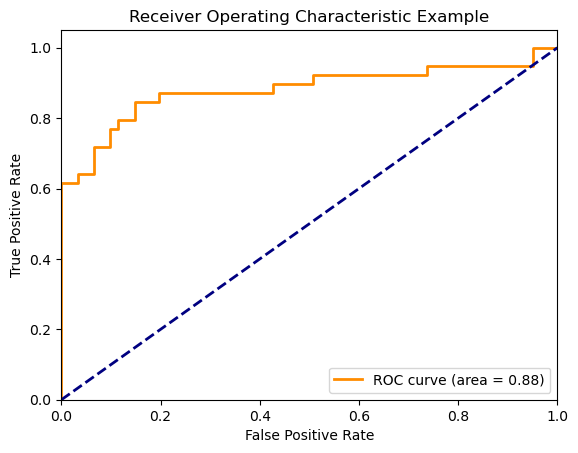

In [11]:
plt.style.use('default')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc='lower right')
plt.show()

![欢迎订阅：坍缩的奇点](../assets/Capture-2023-11-02-164446.png)